## Initial Data Analysis of the Unmatched, Unlabeled Tweets Data

This analysis looks at summary statistics and high-level descriptives within the sample of tweets scraped from Fortune 100 companies and associated CEO Twitter accounts +/- 3 weeks around May 25th, 2020. 

Future analyses will do more detailed classification, regression, and text analyses. Depending on the analysis, I will link these data to Compustat data, which contain more CEO, company, and industry features.  
    

In [147]:
import sys
assert sys.version_info >= (3, 5)

import pandas as pd
import numpy as np
import datetime as dt
import os

# Import Matplotlib and Seaborn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

##  A few useful functions and setup items
# Changing directories
def change_dir(num_steps_back, path_ext):
    """
    :param num_steps_back: how many steps back up the dir you need (1 step represented as '.', 2 steps as '..', etc.)
    :param path_ext: the desired path within project root folder (e.g., src, data)
    :return: (none)
    """
    print('Old Working Directory: ' + os.getcwd())
    os.chdir(num_steps_back)
    if not os.path.isdir(os.getcwd() + path_ext):
        os.makedirs(os.getcwd() + path_ext)
    new_dir = os.path.join(os.getcwd() + path_ext)
    os.chdir(new_dir)
    print('      ')
    print('New Working Directory: ' + os.getcwd())

    
# Saving images
def save_image(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    ch_dir('..', '/analysis/figures')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_id, format=fig_extension, dpi=resolution)
    ch_dir('...', '/notebooks')

In [148]:
# Change the directory to download the data and return to the notebooks folder.
change_dir('..', '/data')
df = pd.read_csv('tweets_df_raw.csv')
change_dir('..', '/notebooks')

Old Working Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets/notebooks
      
New Working Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets/data
Old Working Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets/data
      
New Working Directory: /Users/pjrooney/Dropbox/Rotman/Research/_Dissertation/PoliticalStancesAndStrategy/5_Data/4_F100Tweets/Political Stance Tweets/notebooks


In [149]:
df.head()
df = df.drop(df.columns[0], 1) # Delete the "Unnamed" column, which is a duplicate of the index

In [150]:
df.head()

,date,tweet_id,text,replies,retweets,likes,quotes,media,source_label,username,compustat_company,user_join_date,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media
0,2020-06-12T00:17:58+00:00,1271235256918487040,An important update from @SusanWojcicki on how...,86,187,1689,14,NaN,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111
1,2020-06-11T06:37:29+00:00,1270968380304941058,Proud that @GoogleCloud is partnering with @Te...,71,417,1937,47,NaN,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111
2,2020-06-11T05:52:43+00:00,1270957112097570816,Also excited that in #Android11 we're making i...,89,408,3016,48,NaN,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111
3,2020-06-11T05:44:05+00:00,1270954939309645824,"Android 11 is now available in beta, with a fo...",152,709,5380,45,NaN,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111
4,2020-05-31T14:03:32+00:00,1267094364976672768,Today on US Google &amp; YouTube homepages we ...,1736,6366,38021,700,photo,Twitter Web App,sundarpichai,ALPHABET INC,2008-03-12T05:51:53+00:00,3374827,351,1483,892,0,111


In [151]:
# Strip date and time information from original "date" feature
df['date_'] = df.date.str[:10]
df['utc_time'] = df.date.str[11:19]

In [152]:
# Convert date and time to DateTime types

In [153]:
df['date_'] = pd.to_datetime(df['date_'])
df['event_date'] = '2020-05-25'
df['event_date'] = pd.to_datetime(df['event_date'])
df['date_'].fillna(0)
df['event_date'].fillna(0)

df['utc_time'] = pd.to_datetime(df['utc_time']).dt.strftime('%H%M%S')

# Drop original date column, rename "date_" column as "date"
df = df.drop(columns=['date'])
df = df.rename(columns={'date_': 'date'})

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41530 entries, 0 to 41529
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           41530 non-null  int64         
 1   text               41530 non-null  object        
 2   replies            41530 non-null  int64         
 3   retweets           41530 non-null  int64         
 4   likes              41530 non-null  int64         
 5   quotes             41530 non-null  int64         
 6   media              3432 non-null   object        
 7   source_label       41530 non-null  object        
 8   username           41530 non-null  object        
 9   compustat_company  41530 non-null  object        
 10  user_join_date     41530 non-null  object        
 11  user_followers     41530 non-null  int64         
 12  user_friends       41530 non-null  int64         
 13  user_statuses      41530 non-null  int64         
 14  user_f

In [156]:
df['days_from_event'] = (df['date'] - df['event_date']).dt.days

In [157]:
df.head()

,tweet_id,text,replies,retweets,likes,quotes,media,source_label,username,compustat_company,...,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media,date,utc_time,event_date,days_from_event
0,1271235256918487040,An important update from @SusanWojcicki on how...,86,187,1689,14,NaN,Twitter Web App,sundarpichai,ALPHABET INC,...,3374827,351,1483,892,0,111,2020-06-12,001758,2020-05-25,18
1,1270968380304941058,Proud that @GoogleCloud is partnering with @Te...,71,417,1937,47,NaN,Twitter Web App,sundarpichai,ALPHABET INC,...,3374827,351,1483,892,0,111,2020-06-11,063729,2020-05-25,17
2,1270957112097570816,Also excited that in #Android11 we're making i...,89,408,3016,48,NaN,Twitter Web App,sundarpichai,ALPHABET INC,...,3374827,351,1483,892,0,111,2020-06-11,055243,2020-05-25,17
3,1270954939309645824,"Android 11 is now available in beta, with a fo...",152,709,5380,45,NaN,Twitter Web App,sundarpichai,ALPHABET INC,...,3374827,351,1483,892,0,111,2020-06-11,054405,2020-05-25,17
4,1267094364976672768,Today on US Google &amp; YouTube homepages we ...,1736,6366,38021,700,photo,Twitter Web App,sundarpichai,ALPHABET INC,...,3374827,351,1483,892,0,111,2020-05-31,140332,2020-05-25,6


In [10]:
df.describe()

,tweet_id,replies,retweets,likes,quotes,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media
count,4.153000e+04,41530.000000,41530.000000,41530.000000,41530.000000,4.153000e+04,41530.000000,4.153000e+04,41530.000000,41530.000000,41530.000000
mean,1.264048e+18,2.334313,4.212979,22.438839,0.994101,2.395559e+06,31896.905803,7.266864e+05,17249.522899,11624.849338,7075.217867
std,4.159712e+15,42.154473,66.119211,390.385367,50.894983,5.329555e+06,41729.762180,9.117064e+05,21276.001204,21365.761350,9488.712544
min,1.257098e+18,0.000000,0.000000,0.000000,0.000000,5.450000e+02,0.000000,1.390000e+02,0.000000,0.000000,24.000000
25%,1.260750e+18,0.000000,0.000000,0.000000,0.000000,2.486740e+05,292.000000,7.281900e+04,4987.000000,1688.000000,2233.000000
50%,1.263550e+18,0.000000,0.000000,0.000000,0.000000,1.082449e+06,9059.000000,1.363700e+05,5266.000000,6005.000000,2946.000000
75%,1.267451e+18,1.000000,0.000000,1.000000,0.000000,1.604150e+06,42921.000000,1.236791e+06,19915.000000,11312.000000,6855.000000
max,1.272317e+18,5112.000000,6366.000000,38021.000000,10019.000000,2.262399e+07,105727.000000,2.284221e+06,81729.000000,92837.000000,35993.000000


<br>
<br>
There are a few things worth noting from this table of summary statistics and the data generating process:
<br>
<br>
(1) There are notable outliers on many of the individual tweet-level features (e.g., replies, retweets), especially on the high end. These features have right-skewed distributions, with one (or more) accounts being prolific tweeters.

(2) The large majority of tweets in the dataset are sourced through customer experience management (CXM) platforms such as Sprinklr and Conversocial (See below). Many of these tweets are one-on-one responses to customer inquiries. While the data only contains tweets in a 3 week window before and after May 25, 2020, the percentage of tweets that originate outside  strictly Twitter sources (e.g., Twitter Web App) could be seen as a rough proxy for the intensity of a company's interaction with individual consumers on Twitter. 
<br>
<br>
One could imagine this factor could have implications for a company's propensity to take a stance/follow-through on the stance. For example, it is reasonable to hypothesize that companies that have greater interaction with individual customers on Twitter may be more likely to find stance-taking on political issues worthwhile.
<br>
<br>

In [11]:
source_label = df['source_label'].value_counts()
source_label

Sprinklr                            15174
SNAP101                              9272
Lithium Tech.                        5916
Salesforce - Social Studio           3682
Conversocial                         2499
Twitter Web App                      1474
Khoros Marketing                     1203
Sprinklr Publishing                   516
Interactions Social Engage            308
Twitter for Advertisers (legacy)      236
Khoros                                235
Sprinklr Publisher                    201
Twitter for iPhone                    200
Hootsuite Inc.                        146
Clarabridge Engage                    133
Twitter Media Studio                  101
Astute Global                          45
Sprout Social                          38
Twitter Web Client                     37
Twitter Ads                            31
Twitter for iPad                       25
Percolate                              19
Liveworld Twitter Integration          18
TweetDeck                         

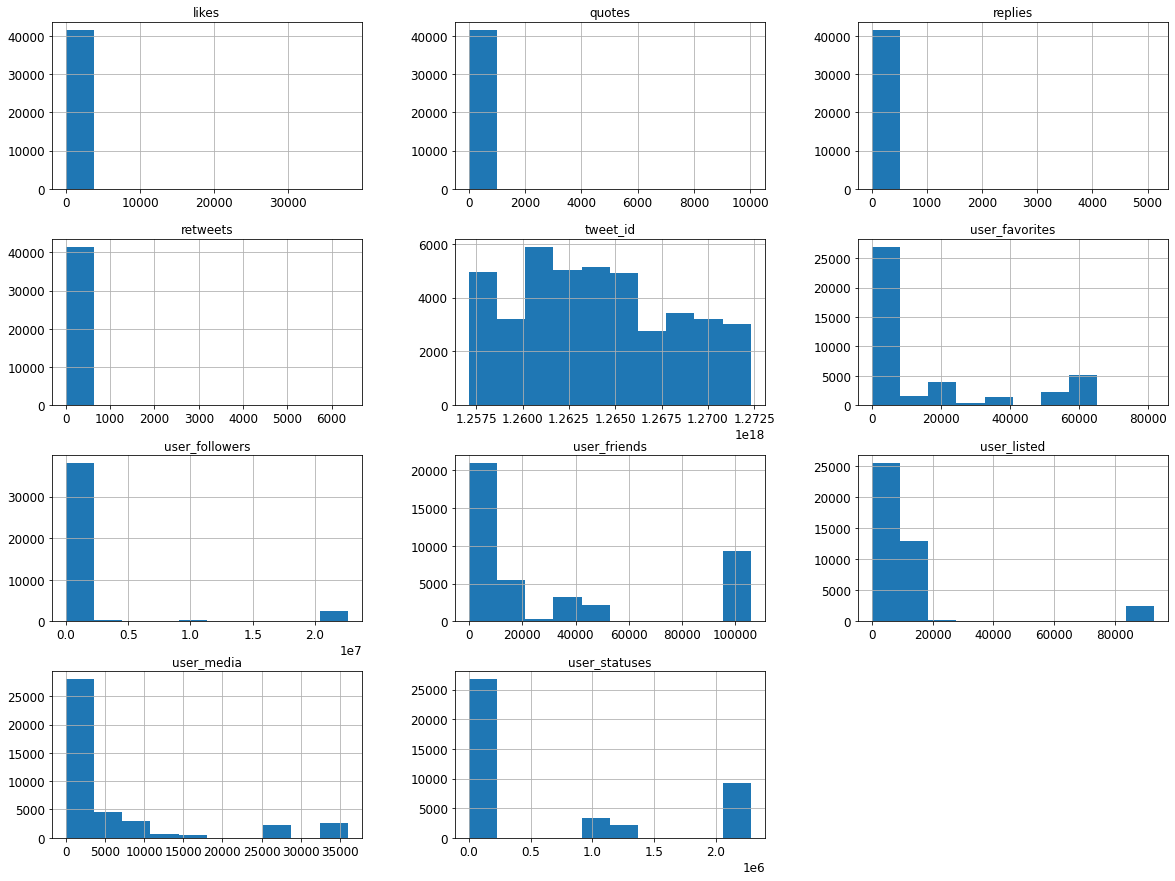

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(20,15))
plt.show()

<br>
<br>
It's tough to visualize a few of these histograms (likes, quotes, replies, retweets) due to outliers at the right end of the distribution. 
<br>
<br>
As examples, looking at the value counts for the number of likes on a tweet and a histogram of tweet replies for tweets with less than 20 replies, one can see that the vast majority of tweets have zero or one likes/replies. So it appears that the data is very right skewed here. More formally, we can use scipy's skewtest, which confirms that these four  features have a larger skewness than a user's cumulative number of favorites and user's number of friends. 
<br>
<br>

In [28]:
likes_val_ct = df['likes'].value_counts()
likes_val_ct

(-38.022, 7604.2]     41512
(7604.2, 15208.4]        12
(15208.4, 22812.6]        3
(22812.6, 30416.8]        2
(30416.8, 38021.0]        1
Name: likes, dtype: int64

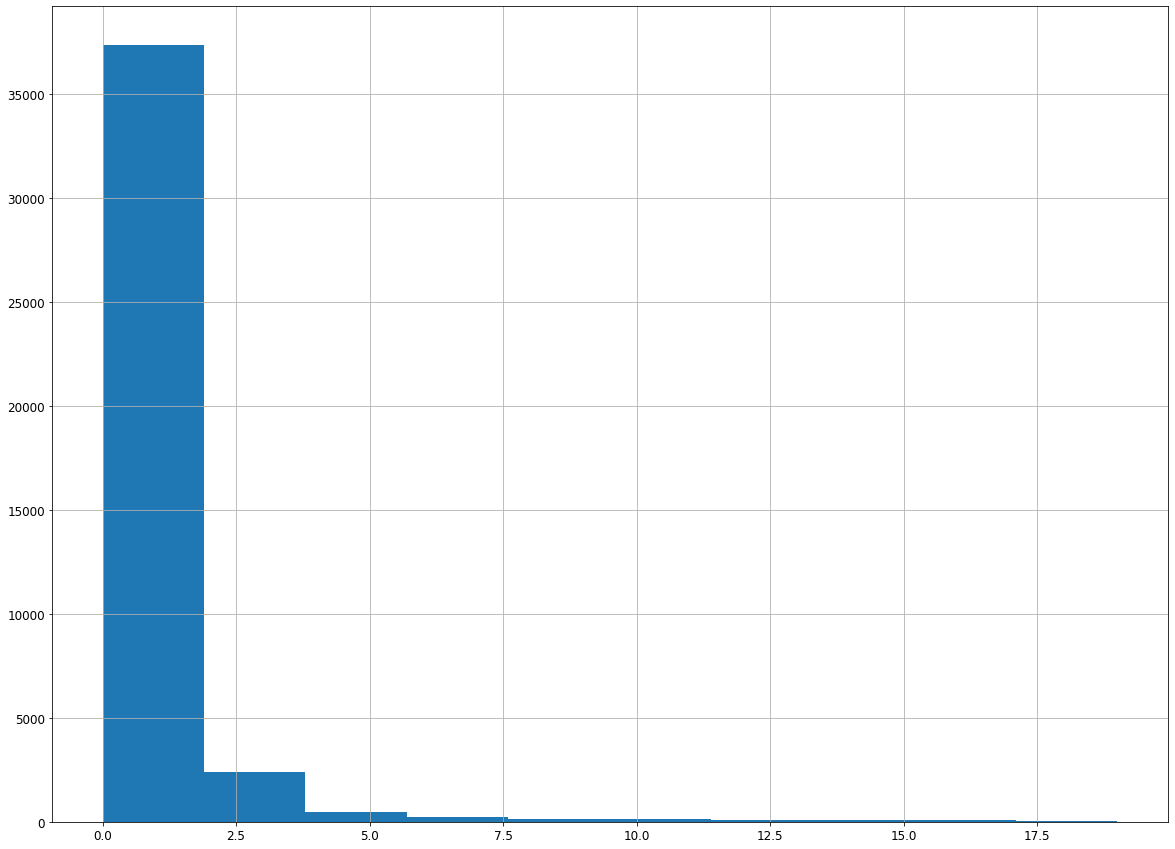

In [20]:
df_replies_cut = df[df['replies'] < 20]
df_replies_cut['replies'].hist(bins = 10, figsize=(20,15))
plt.show()

In [23]:
from scipy import stats
stats.skewtest(df[['likes', 'quotes', 'replies', 'retweets', 'user_favorites', 'user_friends']])

SkewtestResult(statistic=array([329.99025802, 415.47148641, 353.46747231, 329.52727879,
        87.73951864,  72.09190793]), pvalue=array([0., 0., 0., 0., 0., 0.]))

<br>
<br>
At this point, there are a few potentially interesting next steps:

1. What tweets are in the right tail of the likes and retweets? These tweets are ostensibly the ones with the most "reach" on Twitter.

2. How do descriptives differ between tweets with non-Twitter sources and those with Twitter Sources?
<br>
<br>

### 1. What types of tweets are in the right tail of likes and retweets? 

Let's start by taking a subsample of the 20-30 tweets with the most likes and most replies. 
<br>
<br>
Below, we see that a reasonable, round-number cutoff for this cursory descriptive analysis would be <b>likes > 5000 and replies > 500 </b>
<br>
<br>

In [294]:
likes_val_ct = df['likes'].value_counts(bins=10)
likes_val_ct

(-38.022, 3802.1]     41493
(3802.1, 7604.2]         19
(7604.2, 11406.3]        11
(19010.5, 22812.6]        3
(34218.9, 38021.0]        1
(26614.7, 30416.8]        1
(22812.6, 26614.7]        1
(11406.3, 15208.4]        1
(30416.8, 34218.9]        0
(15208.4, 19010.5]        0
Name: likes, dtype: int64

In [307]:
replies_val_ct = df['replies'][df['replies'] > 10].value_counts(bins=10)
replies_val_ct

(5.898, 521.1]      815
(521.1, 1031.2]      12
(1031.2, 1541.3]      7
(4601.9, 5112.0]      1
(3581.7, 4091.8]      1
(2051.4, 2561.5]      1
(1541.3, 2051.4]      1
(4091.8, 4601.9]      0
(3071.6, 3581.7]      0
(2561.5, 3071.6]      0
Name: replies, dtype: int64

<br>
<br>
How do these small samples compare with the full sample? 
<br>
<br>
Including both the categorical and numerical data types, we can see a few interesting patterns:
<br>
<br>
(1) The most prolific Twitter user in the full sample is American Airlines, compared to Facebook in the "most replied" subsample and Apple CEO Tim Cook in the "most liked" subsample. The most common source label is a customer experience management platform (Sprinklr) in the full sample and is the Twitter Web App in the subsamples, which likely means that our subsamples filter out a good deal of the company's customer service reply tweets.
<br>
<br>
(2) The mean user attached to each tweet in the subsample has more followers, fewer friends, and fewer statuses than those in the full sample. Combined with patterns mentioned in (1), one might begin to imagine that a greater proportion of these subsample tweets are coming from publicity-friendly CEOs, who tend to engage with Twitter less often than the average company account but maintain a strong presence among their followers.
<br>
<br>

In [332]:
df.describe(include='all')

,tweet_id,text,replies,retweets,likes,quotes,media,source_label,username,compustat_company,...,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media,date,utc_time,event_date,days_from_event
count,4.153000e+04,41530,41530.000000,41530.000000,41530.000000,41530.000000,3432,41530,41530,41530,...,4.153000e+04,41530.000000,4.153000e+04,41530.000000,41530.000000,41530.000000,41530,41530,41530,41530.000000
unique,NaN,41440,NaN,NaN,NaN,NaN,3,26,92,80,...,NaN,NaN,NaN,NaN,NaN,NaN,42,30588,1,NaN
top,NaN,@VioletReads Thank you for reaching out. Capit...,NaN,NaN,NaN,NaN,gif,Sprinklr,AmericanAir,AMERICAN AIRLINES GROUP INC,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-20 00:00:00,130001,2020-05-25 00:00:00,NaN
freq,NaN,8,NaN,NaN,NaN,NaN,1343,15174,9319,9319,...,NaN,NaN,NaN,NaN,NaN,NaN,2147,21,41530,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-04 00:00:00,NaN,2020-05-25 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-14 00:00:00,NaN,2020-05-25 00:00:00,NaN
mean,1.264048e+18,NaN,2.334313,4.212979,22.438839,0.994101,NaN,NaN,NaN,NaN,...,2.395559e+06,31896.905803,7.266864e+05,17249.522899,11624.849338,7075.217867,NaN,NaN,NaN,-2.412112
std,4.159712e+15,NaN,42.154473,66.119211,390.385367,50.894983,NaN,NaN,NaN,NaN,...,5.329555e+06,41729.762180,9.117064e+05,21276.001204,21365.761350,9488.712544,NaN,NaN,NaN,11.481837
min,1.257098e+18,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,5.450000e+02,0.000000,1.390000e+02,0.000000,0.000000,24.000000,NaN,NaN,NaN,-21.000000
25%,1.260750e+18,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,2.486740e+05,292.000000,7.281900e+04,4987.000000,1688.000000,2233.000000,NaN,NaN,NaN,-11.000000


In [333]:
df[df['replies'] > 500].describe(include='all')

,tweet_id,text,replies,retweets,likes,quotes,media,source_label,username,compustat_company,...,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media,date,utc_time,event_date,days_from_event
count,2.400000e+01,24,24.000000,24.000000,24.000000,24.000000,13,24,24,24,...,2.400000e+01,24.000000,2.400000e+01,24.000000,24.000000,24.000000,24,24,24,24.000000
unique,NaN,24,NaN,NaN,NaN,NaN,2,7,17,16,...,NaN,NaN,NaN,NaN,NaN,NaN,16,23,1,NaN
top,NaN,"To our Black associates, customers and allies:...",NaN,NaN,NaN,NaN,photo,Twitter Web App,Facebook,TARGET CORP,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-05 00:00:00,160001,2020-05-25 00:00:00,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,9,6,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2,24,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-06 00:00:00,NaN,2020-05-25 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-12 00:00:00,NaN,2020-05-25 00:00:00,NaN
mean,1.266071e+18,NaN,1273.250000,1087.583333,5644.416667,713.250000,NaN,NaN,NaN,NaN,...,4.115001e+06,7310.250000,1.357680e+05,11679.666667,14343.583333,6711.250000,NaN,NaN,NaN,3.041667
std,3.952215e+15,NaN,1101.911827,1772.695538,9224.163579,2008.576031,NaN,NaN,NaN,NaN,...,6.071052e+06,13032.565073,3.081928e+05,16619.983759,21420.225221,8731.513337,NaN,NaN,NaN,10.880694
min,1.258049e+18,NaN,521.000000,43.000000,272.000000,32.000000,NaN,NaN,NaN,NaN,...,1.604470e+05,0.000000,1.128000e+03,3.000000,0.000000,111.000000,NaN,NaN,NaN,-19.000000
25%,1.263540e+18,NaN,645.000000,136.750000,613.750000,79.500000,NaN,NaN,NaN,NaN,...,3.428620e+05,252.500000,1.456100e+04,1820.500000,1989.500000,1811.500000,NaN,NaN,NaN,-4.000000


In [334]:
df[df['likes'] > 5000].describe(include='all')

,tweet_id,text,replies,retweets,likes,quotes,media,source_label,username,compustat_company,...,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media,date,utc_time,event_date,days_from_event
count,3.100000e+01,31,31.000000,31.000000,31.000000,31.000000,13,31,31,31,...,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31,31,31,31.000000
unique,NaN,31,NaN,NaN,NaN,NaN,3,8,12,10,...,NaN,NaN,NaN,NaN,NaN,NaN,20,31,1,NaN
top,NaN,"At this time, we will be using our platform to...",NaN,NaN,NaN,NaN,photo,Twitter Web App,tim_cook,APPLE INC,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01 00:00:00,150003,2020-05-25 00:00:00,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,11,10,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,31,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-04 00:00:00,NaN,2020-05-25 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-11 00:00:00,NaN,2020-05-25 00:00:00,NaN
mean,1.264630e+18,NaN,541.387097,1718.225806,11246.709677,541.258065,NaN,NaN,NaN,NaN,...,5.315135e+06,779.064516,15550.354839,6096.225806,10362.451613,2714.483871,NaN,NaN,NaN,-0.838710
std,3.847160e+15,NaN,942.484966,1389.770334,7598.519857,1783.837604,NaN,NaN,NaN,NaN,...,5.277075e+06,1740.441973,32612.758289,10386.117012,10335.353327,5364.398797,NaN,NaN,NaN,10.646116
min,1.257295e+18,NaN,36.000000,370.000000,5131.000000,7.000000,NaN,NaN,NaN,NaN,...,4.236800e+04,51.000000,502.000000,3.000000,0.000000,85.000000,NaN,NaN,NaN,-21.000000
25%,1.262605e+18,NaN,137.000000,896.500000,6866.500000,45.000000,NaN,NaN,NaN,NaN,...,2.180070e+05,70.000000,1128.000000,1430.000000,916.000000,111.000000,NaN,NaN,NaN,-6.500000


<br>
<br>
Now let's look at the days from the shooting (where negative days indicate days prior to May 25) and the associated text of these tweets.

Although the output only contains surface level evidence, one can see strong representation of words that are associated with taking a stance on the event (e.g., "Minneapolis", "race", "using our platform"). This warrants a more rigorous text analysis with the data.
<br>
<br>

In [319]:
# Likes > 5000

df_indiv_tweets = df[['date','days_from_event', 'text', 'replies', 'retweets', 'likes', 'quotes', 'source_label', 'compustat_company']]
df_indiv_tweets[['days_from_event','text']][df_indiv_tweets['likes']>5000]

,days_from_event,text
3,17,"Android 11 is now available in beta, with a fo..."
4,6,Today on US Google &amp; YouTube homepages we ...
9,-5,The #COVID19 Exposure Notification technology ...
11,-13,We've re-engineered Google Meet to make secure...
18,17,The unfinished work of racial justice and equa...
19,10,"Today, as Minneapolis gathers and the nation m..."
20,4,Minneapolis is grieving for a reason. To parap...
22,0,We will never forget the memory and sacrifice ...
23,-2,"Wishing safety, happiness and peace to those c..."
26,-5,Technology can help health officials rapidly t...


In [320]:
# Replies > 500
df_indiv_tweets[['days_from_event','text']][df_indiv_tweets['replies']>500]

,days_from_event,text
4,6,Today on US Google &amp; YouTube homepages we ...
18,17,The unfinished work of racial justice and equa...
1339,9,"Today Googlers are holding an 8-minute, 46-sec..."
3381,9,Amazon stands in solidarity with the Black com...
3383,6,https://t.co/yI4MYEDz4C
15207,-5,We're all in for the release of the #JusticeLe...
16521,-2,Who would you rather caddie for? #CapitalOnesT...
16570,11,black lives matter. words from our leaders: ht...
17336,14,"Racism, hate and inequality have no place in o..."
18465,18,Hatred and discrimination have no place in our...


<br>
<br>
We can also take a look at kernel density distributions of these subsamples of tweets compared to the full sample. 

Compared to the full sample and a less constrained cut of the data (1000 most liked/replied tweets), the subsamples have a notable center of mass at the event date and just right of the event date. This is especially true for tweets with many replies. The tweets with the most replies peak around a week after the event.

Coupled with the cursory analysis above, it appears that political stance tweets may attract significant attention relative to the average corporate tweet.
<br>
<br>

Text(0.5, 1.0, 'Density of Tweets with Different Amounts of Likes')

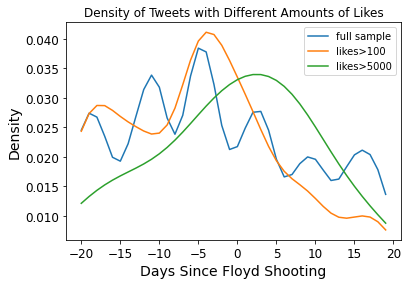

In [309]:
# Full Sample of Tweets (n~45,000), >100 Likes (n~1000), >5000 Likes (n~30)
ax = df_indiv_tweets['days_from_event'].plot.kde(ind=np.arange(-20, 20, 1).tolist(), legend=True)
l_100 = df_indiv_tweets['days_from_event'][df_indiv_tweets['likes']>100].plot.kde(ind=np.arange(-20, 20, 1).tolist(), ax=ax, legend=True)
l_5000 = df_indiv_tweets['days_from_event'][df_indiv_tweets['likes']>5000].plot.kde(ind=np.arange(-20, 20, 1).tolist(), ax=ax, legend=True)
ax.set_xlabel("Days Since Floyd Shooting")
ax.legend(['full sample', 'likes>100', 'likes>5000'])
ax.set_title('Density of Tweets with Different Amounts of Likes')


Text(0.5, 1.0, 'Density of Tweets with Different Amounts of Replies')

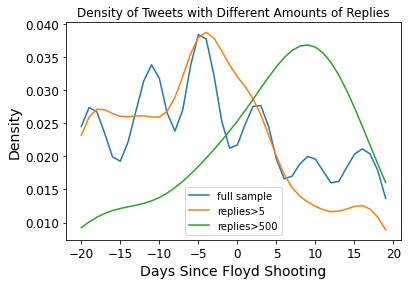

In [310]:
# Full Sample of Tweets (n~45,000), >5 Replies (n~1000), >500 Replies (n~30)

ax = df_indiv_tweets['days_from_event'].plot.kde(ind=np.arange(-20, 20, 1).tolist(), legend=True)
l_100 = df_indiv_tweets['days_from_event'][df_indiv_tweets['replies']>5].plot.kde(ind=np.arange(-20, 20, 1).tolist(), ax=ax, legend=True)
l_5000 = df_indiv_tweets['days_from_event'][df_indiv_tweets['replies']>500].plot.kde(ind=np.arange(-20, 20, 1).tolist(), ax=ax, legend=True)
ax.set_xlabel("Days Since Floyd Shooting")
ax.legend(['full sample', 'replies>5', 'replies>500'])
ax.set_title('Density of Tweets with Different Amounts of Replies')

### 2. How do tweets with non-Twitter sources compare to those with Twitter sources?

As previously noted, most of the tweets in this sample are sourced through outside customer experience management (CXM) platforms. Many of these tweets are one-on-one discussions with individual customers, usually about some sort of customer service issue. Let's examine whether there are differences in the tweets sourced through these outlets versus those sourced directly through Twitter. 
<br>
<br>
Before going any further, it's worth noting that not <b>all</b> of these CXM tweets are simply customer service issues. As an example related to the previous section, many of the most liked tweets in this time period were sourced through CXM platforms. A few of these, like Amazon's tweet with a URL in the text field, are clear public political stances.
<br>
<br>

In [318]:
df_indiv_tweets[['days_from_event','text','source_label', 'compustat_company']][df_indiv_tweets['likes']>5000]

,days_from_event,text,source_label,compustat_company
3,17,"Android 11 is now available in beta, with a fo...",Twitter Web App,ALPHABET INC
4,6,Today on US Google &amp; YouTube homepages we ...,Twitter Web App,ALPHABET INC
9,-5,The #COVID19 Exposure Notification technology ...,Twitter Web App,ALPHABET INC
11,-13,We've re-engineered Google Meet to make secure...,Twitter Web App,ALPHABET INC
18,17,The unfinished work of racial justice and equa...,Twitter Media Studio,APPLE INC
19,10,"Today, as Minneapolis gathers and the nation m...",Twitter Web App,APPLE INC
20,4,Minneapolis is grieving for a reason. To parap...,Twitter for iPhone,APPLE INC
22,0,We will never forget the memory and sacrifice ...,Twitter for iPad,APPLE INC
23,-2,"Wishing safety, happiness and peace to those c...",Twitter for iPhone,APPLE INC
26,-5,Technology can help health officials rapidly t...,Twitter for iPad,APPLE INC


In [362]:
df['twitter_source'] = (df.source_label.str[:7] == "Twitter")

In [363]:
df[['source_label', 'twitter_source']]

,source_label,twitter_source
0,Twitter Web App,True
1,Twitter Web App,True
2,Twitter Web App,True
3,Twitter Web App,True
4,Twitter Web App,True
...,...,...
41525,Sprinklr,False
41526,Sprinklr,False
41527,Sprinklr,False
41528,Sprinklr,False


<br>
<br>
Looking at summary statistics of the features with numerical data types, we can see that the average Twitter-sourced tweet has, on average, more replies, retweets, likes, and quotes than the average tweet from non-Twitter sources. This provides supporting evidence behind the idea that companies may tend to outsource Twitter engagement that might not be of interest to the general public.
<br>
<br>

In [370]:
df[df['twitter_source']==True].describe()

,tweet_id,replies,retweets,likes,quotes,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media,days_from_event
count,2.107000e+03,2107.000000,2107.000000,2107.000000,2107.000000,2.107000e+03,2107.000000,2.107000e+03,2107.000000,2107.000000,2107.000000,2107.000000
mean,1.263096e+18,19.572378,48.133840,266.877076,7.678215,1.784758e+06,7143.067869,9.323268e+04,12952.792121,7470.834362,7785.747983,-5.110109
std,4.133487e+15,88.659334,266.453754,1580.928178,47.561026,4.595752e+06,11811.132350,2.529223e+05,17697.126802,17523.526082,10333.121990,11.400056
min,1.257132e+18,0.000000,0.000000,0.000000,0.000000,7.110000e+02,5.000000,1.390000e+02,3.000000,0.000000,24.000000,-21.000000
25%,1.259535e+18,0.000000,0.000000,3.000000,0.000000,5.836850e+04,532.000000,5.077000e+03,1907.000000,806.000000,1264.000000,-15.000000
50%,1.262771e+18,1.000000,4.000000,19.000000,0.000000,3.742580e+05,2060.000000,1.831100e+04,4657.000000,2613.000000,3004.000000,-6.000000
75%,1.266060e+18,8.000000,16.000000,73.500000,2.000000,9.054370e+05,9059.000000,1.262410e+05,12947.000000,5501.000000,6855.000000,3.000000
max,1.272269e+18,1736.000000,6366.000000,38021.000000,1277.000000,2.262399e+07,105727.000000,2.284221e+06,81729.000000,92837.000000,35993.000000,20.000000


In [371]:
df[df['twitter_source']==False].describe()

,tweet_id,replies,retweets,likes,quotes,user_followers,user_friends,user_statuses,user_favorites,user_listed,user_media,days_from_event
count,3.942300e+04,39423.000000,39423.000000,39423.000000,39423.000000,3.942300e+04,39423.000000,3.942300e+04,39423.000000,39423.000000,39423.000000,39423.000000
mean,1.264099e+18,1.413008,1.865586,9.374604,0.636862,2.428204e+06,33219.898384,7.605420e+05,17479.165792,11846.864648,7037.242904,-2.267915
std,4.155022e+15,37.885652,26.532350,153.826859,51.042974,5.364043e+06,42337.830850,9.217507e+05,21426.421153,21529.472137,9440.093303,11.468481
min,1.257098e+18,0.000000,0.000000,0.000000,0.000000,5.450000e+02,0.000000,1.530000e+02,0.000000,9.000000,47.000000,-21.000000
25%,1.260910e+18,0.000000,0.000000,0.000000,0.000000,2.486740e+05,292.000000,1.010610e+05,4987.000000,2196.000000,2233.000000,-11.000000
50%,1.263591e+18,0.000000,0.000000,0.000000,0.000000,1.082449e+06,12146.000000,1.627440e+05,5266.000000,6249.000000,2946.000000,-4.000000
75%,1.267484e+18,1.000000,0.000000,1.000000,0.000000,1.604150e+06,42921.000000,1.236791e+06,19915.000000,11312.000000,6855.000000,7.000000
max,1.272317e+18,5112.000000,1961.000000,10901.000000,10019.000000,2.262399e+07,105727.000000,2.284221e+06,81729.000000,92837.000000,35993.000000,20.000000
